# <center> PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle

### _Первоначальная версия датасета содержит 17 полей со следующей информацией:_

* _hotel_address_ — адрес отеля;
* _review_date_ — дата, когда рецензент разместил соответствующий отзыв;
* _average_score_ — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* _hotel_name_ — название отеля;
* _reviewer_nationality_ — страна рецензента;
* _negative_review_ — отрицательный отзыв, который рецензент дал отелю;
* _review_total_negative_word_counts_ — общее количество слов в отрицательном отзыв;
* _positive_review_ — положительный отзыв, который рецензент дал отелю;
* _review_total_positive_word_counts_ — общее количество слов в положительном отзыве.
* _reviewer_score_ — оценка, которую рецензент поставил отелю на основе своего опыта;
* _total_number_of_reviews_reviewer_has_given_ — количество отзывов, которые рецензенты дали в прошлом;
* _total_number_of_reviews_ — общее количество действительных отзывов об отеле;
* _tags_ — теги, которые рецензент дал отелю;
* _days_since_review_ — количество дней между датой проверки и датой очистки;
* _additional_number_of_scoring_ — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* _lat_ — географическая широта отеля;
* _lng_ — географическая долгота отеля.

In [56]:
import pandas as pd

hotels = pd.read_csv('D:\скилфэктори\КУРС DS\EDA\PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle\hotels.csv')
hotels.head(3)

<>:3: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
<>:3: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
C:\Users\Светлана\AppData\Local\Temp\ipykernel_3240\586472174.py:3: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
  hotels = pd.read_csv('D:\скилфэктори\КУРС DS\EDA\PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle\hotels.csv')


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [57]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

## Работа со строковыми данными

### Признак _hotel_name_ — название отеля

In [58]:
# Выведем количество уникальных названий отелей представленных в наборе данных
hotels['hotel_name'].value_counts()

hotel_name
Britannia International Hotel Canary Wharf           3587
Strand Palace Hotel                                  3206
Park Plaza Westminster Bridge London                 3095
Copthorne Tara Hotel London Kensington               2688
DoubleTree by Hilton Hotel London Tower of London    2379
                                                     ... 
Ibis Styles Milano Palmanova                            7
Renaissance Paris Republique Hotel Spa                  7
Hotel Wagner                                            6
Hotel Gallitzinberg                                     6
Mercure Paris Porte d Orleans                           5
Name: count, Length: 1492, dtype: int64

В наборе данных очевидны топ-3 отеля — Britannia International Hotel Canary Wharf, Strand Palace Hotel, Park Plaza Westminster Bridge London. Возможно, это не случайность, и этот факт может повлиять на рейтинг. Выделим этот факт.

Можем создать новый бинарный 
* признак is_Britannia и присвоить ему 1 в случае, если это отель Britannia International Hotel Canary Wharf, иначе — 0; 
* признак is_Strand и присвоить ему 1 в случае, если это отель для Strand Palace Hotel, иначе — 0;
* признак is_Park_Plaza и присвоить ему 1 в случае, если это отель для Park Plaza Westminster Bridge London, иначе — 0.

In [59]:
hotels['is_Britannia'] = hotels['hotel_name'].apply(lambda x: 1 if x == 'Britannia International Hotel Canary Wharf' else 0)
hotels['is_Strand'] = hotels['hotel_name'].apply(lambda x: 1 if x == 'Strand Palace Hotel' else 0)
hotels['is_Park_Plaza'] = hotels['hotel_name'].apply(lambda x: 1 if x == 'Park Plaza Westminster Bridge London' else 0)
display(hotels.head(3))

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,is_Britannia,is_Strand,is_Park_Plaza
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,0,0,0


### Признак _review_date_ — дата, когда рецензент разместил соответствующий отзыв

In [60]:
# Преобразуем столбец с датой в формат datetime
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
# Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
print(hotels['review_date'].max())
# Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.
print(hotels['review_date'].min())

2017-08-03 00:00:00
2015-08-04 00:00:00


In [61]:
# Извлекаем месяц из поля review_date и сохраняем в новый столбец month_review
hotels['month_review'] = hotels['review_date'].dt.month
# Извлекаем год из поля review_date и сохраняем в новый столбец year_review
hotels['year_review'] = hotels['review_date'].dt.year

Создадим признак - количество дней с момента свежего отзыва — 2017-08-03.

In [62]:
one_date = pd.to_datetime('2017-08-03')
hotels['years_diff'] = (one_date - hotels['review_date']).dt.days
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags,days_since_review,lat,lng,is_Britannia,is_Strand,is_Park_Plaza,month_review,year_review,years_diff
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,0,0,0,2,2016,531
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,0,0,0,1,2017,203
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,0,0,0,10,2016,289


### Признак _reviewer_nationality_ — страна рецензента

In [63]:
# проверим количество уникальных значений признака reviewer_nationality.
print(hotels['reviewer_nationality'].value_counts().shape[0])
hotels['reviewer_nationality'].value_counts().sort_values(ascending=False)
print(hotels['reviewer_nationality'].unique().tolist())

225
[' United Kingdom ', ' China ', ' Poland ', ' France ', ' Switzerland ', ' Bulgaria ', ' Lebanon ', ' United Arab Emirates ', ' South Africa ', ' Nigeria ', ' Sweden ', ' United States of America ', ' Hong Kong ', ' Luxembourg ', ' Netherlands ', ' Jersey ', ' Pakistan ', ' Mexico ', ' Italy ', ' Singapore ', ' Ireland ', ' Kuwait ', ' Bahrain ', ' Portugal ', ' Canada ', ' Germany ', ' Oman ', ' Austria ', ' Japan ', ' Ukraine ', ' Finland ', ' Iran ', ' Thailand ', ' Brazil ', ' Denmark ', ' Australia ', ' Spain ', ' Gabon ', ' New Zealand ', ' Israel ', ' Cyprus ', ' Gibraltar ', ' Turkey ', ' Egypt ', ' Indonesia ', ' Slovakia ', ' Qatar ', ' Romania ', ' Belgium ', ' Trinidad and Tobago ', ' ', ' Saudi Arabia ', ' Bhutan ', ' Iceland ', ' Norway ', ' Sri Lanka ', ' Isle of Man ', ' Greece ', ' Slovenia ', ' Serbia ', ' Czech Republic ', ' Hungary ', ' Latvia ', ' Estonia ', ' South Korea ', ' Malaysia ', ' Malta ', ' Bosnia and Herzegovina ', ' Jordan ', ' Chile ', ' India ', 

In [64]:
continent_map = {
    # Европа
    'United Kingdom': 'Europe',
    'Belgium': 'Europe',
    'Sweden': 'Europe',
    'Netherlands': 'Europe',
    'Ireland': 'Europe',
    'Norway': 'Europe',
    'Bulgaria': 'Europe',
    'Italy': 'Europe',
    'Czech Republic': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Spain': 'Europe',
    'Switzerland': 'Europe',
    'Macedonia': 'Europe',
    'Poland': 'Europe',
    'Romania': 'Europe',
    'Cyprus': 'Europe',
    'Portugal': 'Europe',
    'Slovakia': 'Europe',
    'Jersey': 'Europe',
    'Gibraltar': 'Europe',
    'Austria': 'Europe',
    'Isle of Man': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Estonia': 'Europe',
    'Malta': 'Europe',
    'Montenegro': 'Europe',
    'Slovenia': 'Europe',
    'Ukraine': 'Europe',
    'Denmark': 'Europe',
    'Finland': 'Europe',
    'Luxembourg': 'Europe',
    'Latvia': 'Europe',
    'Croatia': 'Europe',
    'Kosovo': 'Europe',
    'Lithuania': 'Europe',
    'Albania': 'Europe',
    'Monaco': 'Europe',
    'Belarus': 'Europe',
    'Moldova': 'Europe',
    'Andorra': 'Europe',
    'Liechtenstein': 'Europe',
    'Vatican City': 'Europe',
    'San Marino': 'Europe',
    'Svalbard Jan Mayen': 'Europe',
    'Faroe Islands': 'Europe',
    'Guernsey': 'Europe',
    
    # Азия
    'Saudi Arabia': 'Asia',
    'United Arab Emirates': 'Asia',
    'Bahrain': 'Asia',
    'Qatar': 'Asia',
    'India': 'Asia',
    'Singapore': 'Asia',
    'Malaysia': 'Asia',
    'Thailand': 'Asia',
    'Turkey': 'Asia',
    'Israel': 'Asia',
    'Lebanon': 'Asia',
    'Pakistan': 'Asia',
    'South Korea': 'Asia',
    'Japan': 'Asia',
    'Azerbaijan': 'Asia',
    'Russia': 'Asia',
    'Brunei': 'Asia',
    'Kuwait': 'Asia',
    'Oman': 'Asia',
    'Hong Kong': 'Asia',
    'China': 'Asia',
    'Armenia': 'Asia',
    'Indonesia': 'Asia',
    'Iraq': 'Asia',
    'Iran': 'Asia',
    'Bangladesh': 'Asia',
    'Kazakhstan': 'Asia',
    'Sri Lanka': 'Asia',
    'Jordan': 'Asia',
    'Vietnam': 'Asia',
    'Macau': 'Asia',
    'Georgia': 'Asia',
    'Syria': 'Asia',
    'Maldives': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Palestinian Territory': 'Asia',
    'Bhutan': 'Asia',
    'Mongolia': 'Asia',
    'Tajikistan': 'Asia',
    'Cambodia': 'Asia',
    'Uzbekistan': 'Asia',
    'Nepal': 'Asia',
    'Laos': 'Asia',
    'Afghanistan': 'Asia',
    'Turkmenistan': 'Asia',
    'Yemen': 'Asia',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Myanmar': 'Asia',
    'Timor-Leste': 'Asia',  # East Timor
    
    # Африка
    'South Africa': 'Africa',
    'Egypt': 'Africa',
    'Kenya': 'Africa',
    'Morocco': 'Africa',
    'Tunisia': 'Africa',
    'Namibia': 'Africa',
    'Senegal': 'Africa',
    'Tanzania': 'Africa',
    'Ghana': 'Africa',
    'Sudan': 'Africa',
    'Ivory Coast': 'Africa',
    'Uganda': 'Africa',
    'Zimbabwe': 'Africa',
    'Ethiopia': 'Africa',
    'Congo': 'Africa',
    'Mozambique': 'Africa',
    'Somalia': 'Africa',
    'Rwanda': 'Africa',
    'Zambia': 'Africa',
    'Benin': 'Africa',
    'Lesotho': 'Africa',
    'Malawi': 'Africa',
    'Swaziland': 'Africa',  # Eswatini
    'Madagascar': 'Africa',
    'Cape Verde': 'Africa',
    'Gabon': 'Africa',
    'South Sudan': 'Africa',
    'Mali': 'Africa',
    'Comoros': 'Africa',
    'Niger': 'Africa',
    'Djibouti': 'Africa',
    'Guinea': 'Africa',
    'Togo': 'Africa',
    'Liberia': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Angola': 'Africa',
    'Mauritius': 'Africa',
    'Seychelles': 'Africa',
    'Nigeria': 'Africa',
    'Algeria': 'Africa',
    'Mauritania': 'Africa',
    'Libya': 'Africa',
    'Gambia': 'Africa',
    'Réunion': 'Africa',
    
    # Северная Америка
    'United States of America': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Costa Rica': 'North America',
    'Cayman Islands': 'North America',
    'Guatemala': 'North America',
    'El Salvador': 'North America',
    'Honduras': 'North America',
    'Nicaragua': 'North America',
    'Panama': 'North America',
    'Bahamas': 'North America',
    'Jamaica': 'North America',
    'Haiti': 'North America',
    'Dominican Republic': 'North America',
    'Bermuda': 'North America',
    'U S Virgin Islands': 'North America',
    'Puerto Rico': 'North America',
    'Belize': 'North America',
    'Barbados': 'North America',
    'Saint Lucia': 'North America',
    'Grenada': 'North America',
    'Anguilla': 'North America',
    'Antigua Barbuda': 'North America',
    'Saint Kitts and Nevis': 'North America',
    'Saint Vincent Grenadines': 'North America',
    'Turks Caicos Islands': 'North America',
    'Dominica': 'North America',
    'Saint Martin': 'North America',
    'Guadeloupe': 'North America',
    'Martinique': 'North America',
    'Curaçao': 'North America',  # Cura ao
    'Aruba': 'North America',
    'Saint Barthélemy': 'North America',  # Saint Barts
    'Saint Pierre and Miquelon': 'North America',
    'Bonaire St Eustatius and Saba': 'North America',
    'Trinidad and Tobago': 'North America',
    
    # Южная Америка
    'Ecuador': 'South America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Peru': 'South America',
    'Colombia': 'South America',
    'Venezuela': 'South America',
    'Chile': 'South America',
    'Guyana': 'South America',
    'Suriname': 'South America',
    'Paraguay': 'South America',
    'Uruguay': 'South America',
    'Bolivia': 'South America',
    'French Guiana': 'South America',
    'Falkland Islands Malvinas': 'South America',
    
    # Австралия и Океания
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Fiji': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania',
    'French Polynesia': 'Oceania',
    'New Caledonia': 'Oceania',
    'Vanuatu': 'Oceania',
    'Cook Islands': 'Oceania',
    'American Samoa': 'Oceania',
    'Tuvalu': 'Oceania',
    'Kiribati': 'Oceania',
    'Guam': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Palau': 'Oceania',
    'Wallis and Futuna': 'Oceania',
    'Cocos K I': 'Oceania',  # Cocos (Keeling) Islands
    
    # Антарктида
    'Antarctica': 'Antarctica',
    
    # Прочие/Неопределенные
    '': 'Unknown',
    'Abkhazia Georgia': 'Other',
    'United States Minor Outlying Islands': 'Other',
    'St Maarten': 'Other',
    'Crimea': 'Other',
    'Central Africa Republic': 'Africa',  # Центральноафриканская Республика
    'Democratic Republic of the Congo': 'Africa',  # Конго-Киншаса
    'Bosnia and Herzegovina': 'Europe'
}

In [65]:
# очистим строки от лишних пробелов
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.strip()

# создадим копию словаря с ключами в нижнем регистре
continent_map_lower = {k.strip().lower(): v for k, v in continent_map.items()}

# применим маппинг 
hotels['reviewer_continent'] = (hotels['reviewer_nationality'].str.lower().map(continent_map_lower).fillna('Unknown'))  

# выведем результат
print(hotels['reviewer_continent'].value_counts())

reviewer_continent
Europe           266636
Asia              56822
North America     33841
Oceania           18744
Africa             6733
South America      2502
Unknown            1345
Other               177
Antarctica            3
Name: count, dtype: int64


In [66]:
# объединим редкие категории 
hotels['reviewer_continent'] = hotels['reviewer_continent'].replace({
    'Antarctica': 'Other',
    'Unknown': 'Other'
})
print(hotels['reviewer_continent'].value_counts())

reviewer_continent
Europe           266636
Asia              56822
North America     33841
Oceania           18744
Africa             6733
South America      2502
Other              1525
Name: count, dtype: int64


In [67]:
# создадим словарь для преобразования континентов в числовые значения
continent_mapping = {
    'Europe': 1,
    'Asia': 2,
    'North America': 3,
    'Oceania': 4,
    'Africa': 5,
    'South America': 6,
    'Other': 7
}

# применим преобразование
hotels['reviewer_continent_encoded'] = hotels['reviewer_continent'].map(continent_mapping)
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,is_Britannia,is_Strand,is_Park_Plaza,month_review,year_review,years_diff,reviewer_continent,reviewer_continent_encoded
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,51.507894,-0.143671,0,0,0,2,2016,531,Europe,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,51.521009,-0.123097,0,0,0,1,2017,203,Europe,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,48.845377,2.325643,0,0,0,10,2016,289,Asia,2
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,48.888697,2.394540,0,0,0,9,2015,681,Europe,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,52.385601,4.847060,0,0,0,3,2016,516,Europe,1


In [68]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

## Удалим признаки с типом object

In [69]:
# создаем списки столбцов по типу данных
object_col_name = list(hotels.select_dtypes(include='object').columns)
value_col_name = list(hotels.select_dtypes(include=['int', 'float']).columns)
data_col_name = list(hotels.select_dtypes(include=['datetime']).columns)

In [70]:
# удаляем нечисловые признаки
hotels = hotels.drop(columns=object_col_name)
hotels = hotels.drop(columns=data_col_name)

In [71]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         384355 non-null  float64
 8   lng                                         384355 non-null  float64
 9   is_Britannia                                386803 non-null  int64  
 

## Работа с пропусками

### В данных еть пропуски в признаках _lat_ — географическая широта отеля и _lng_ — географическая долгота отеля.

Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце. Умножаем на 100 %, находим столбцы, где доля пропусков больше 0. Сортируем по убыванию и выводим результат

In [72]:
cols_null_percent = hotels.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

lat    0.63288
lng    0.63288
dtype: float64

Т.к. эти столбцы имеют пропуски менее 30 %, значит их не удаляем, а заменяем эти пропущенные значения. Но, т.к. это данные о географических показателях долготы и широты, то скорее не очень информативно и логично будет заменить пропущенные значения, например, на среднее, медиану и т.п. Можно попробовать заменить значения на 0. Т.е. в данном случае "нулевые" значения являются как-будто константами, но в числовом представлении, при этом данные значения не несут никакой информации, но за счет того, что пропусков мало, на мой взгляд, это может быть уместно, и это особенно сильно не повлияет на модель.

In [73]:
hotels['lat'].fillna(0, inplace=True)
hotels['lng'].fillna(0, inplace=True)
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,is_Britannia,is_Strand,is_Park_Plaza,month_review,year_review,years_diff,reviewer_continent_encoded
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.130604,2.805533,0.009273,0.008288,0.008001,6.489125,2016.120707,354.387978,1.592881
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,5.226613,4.570018,0.095851,0.090663,0.089093,3.351116,0.687740,208.975174,1.078719
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,0.000000,-0.369758,0.000000,0.000000,0.000000,1.000000,2015.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.212857,-0.143372,0.000000,0.000000,0.000000,4.000000,2016.000000,175.000000,1.000000
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,0.000000,0.000000,0.000000,0.000000,7.000000,2016.000000,353.000000,1.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.831098,0.000000,0.000000,0.000000,9.000000,2017.000000,527.000000,2.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233,1.000000,1.000000,1.000000,12.000000,2017.000000,730.000000,7.000000


## Отбор признаков

### Признаки могут дублировать информацию. Анализ мультиколлинеарности мы будем использовать, чтобы выбрать уникальные признаки для модели.

<Axes: >

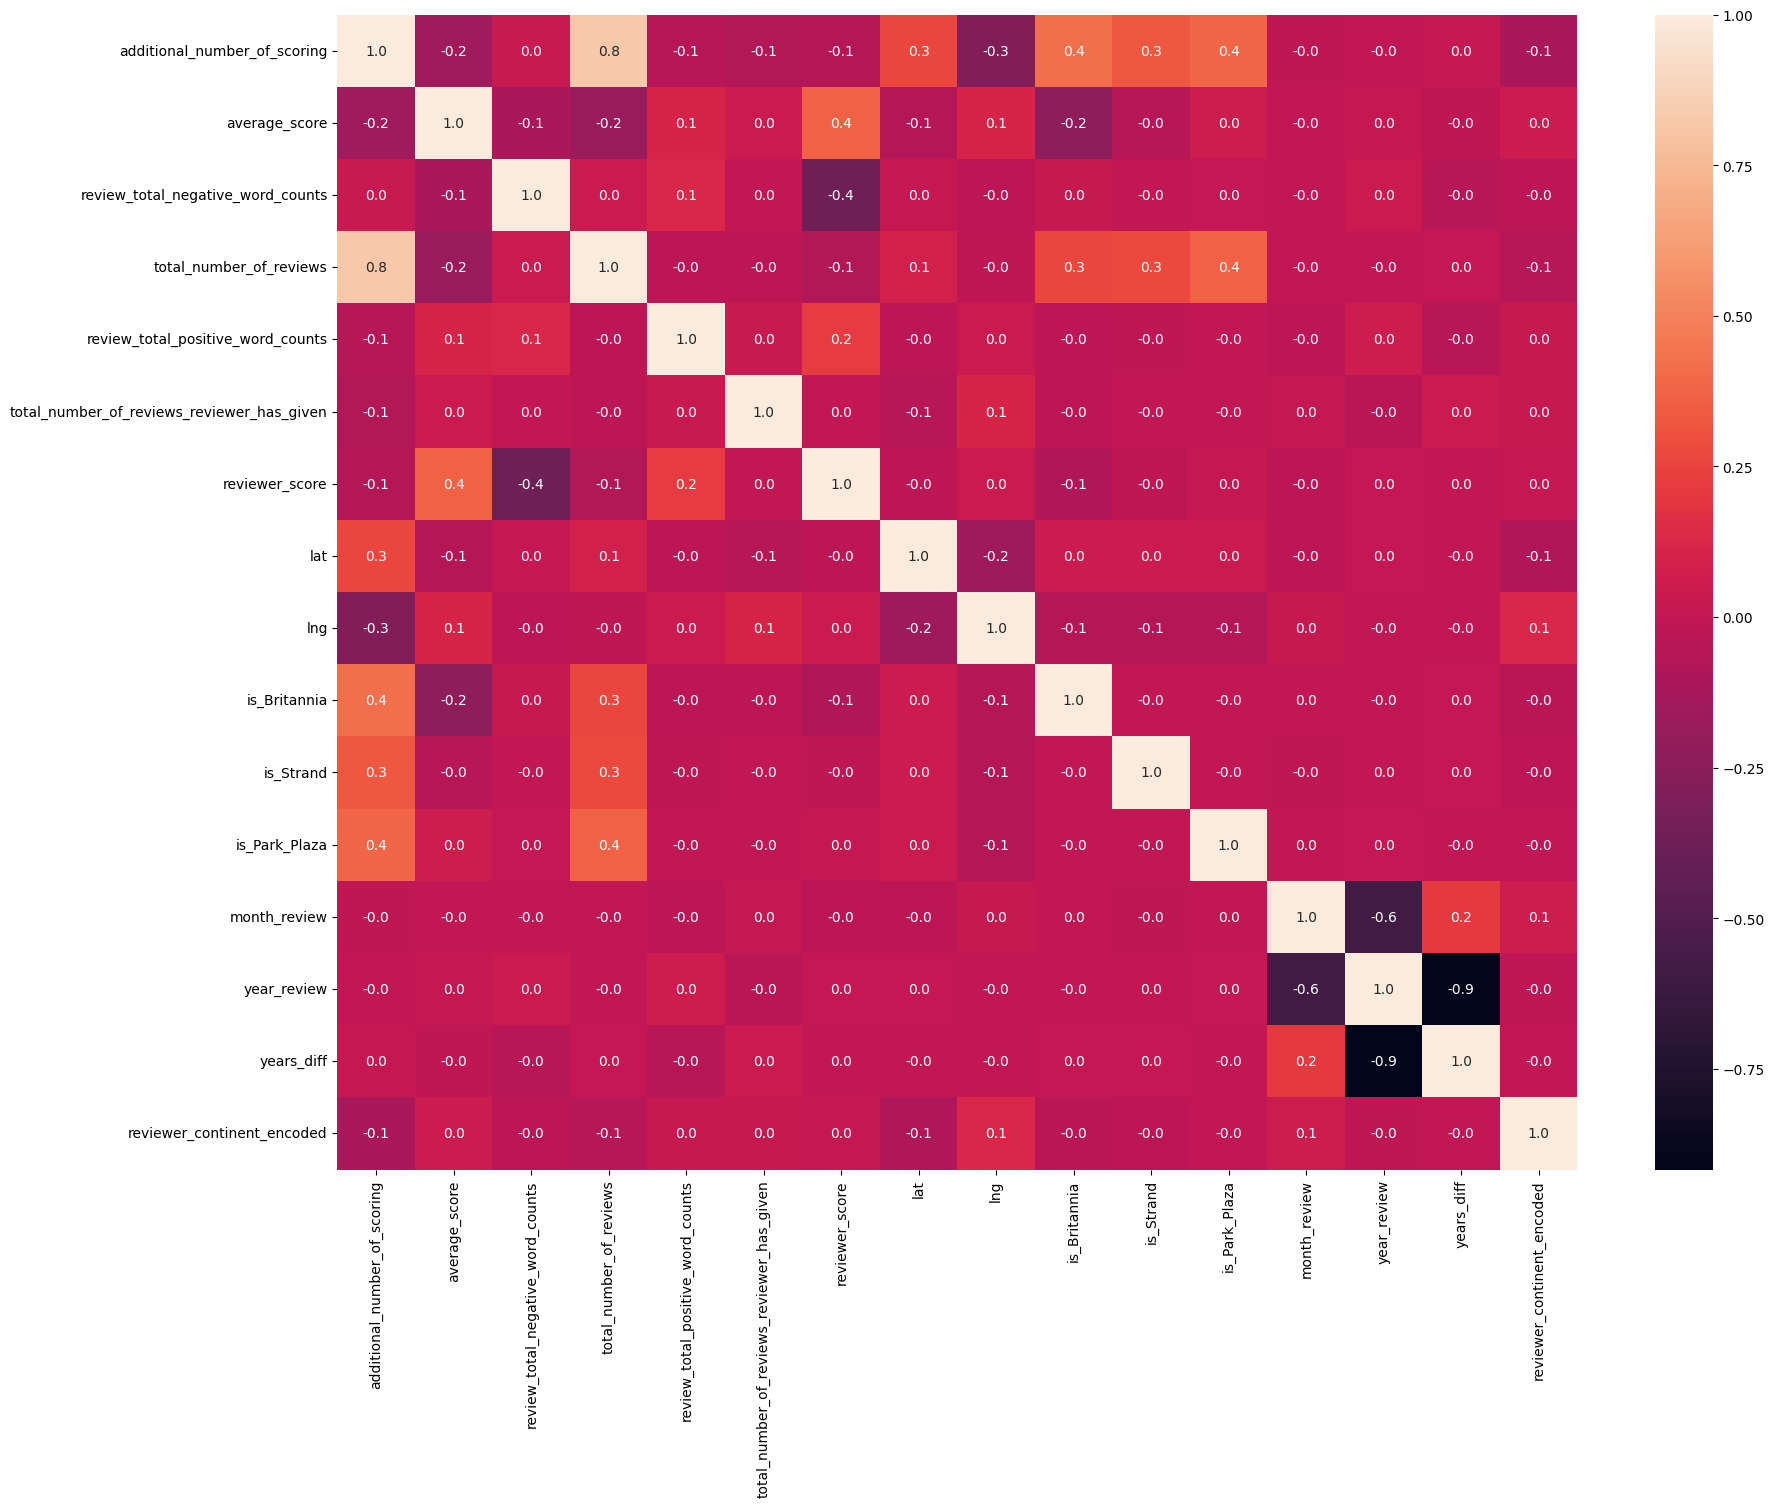

In [74]:
# проведём корреляционный анализ данных, чтобы определить зависимость признаков
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
ax = plt.figure(figsize=(20,15))
sns.heatmap(hotels.corr(numeric_only=True), annot=True, fmt='.1f')

In [75]:
# удалим признаки с сильной корреляцией
hotels.drop(['years_diff', 'year_review', 'additional_number_of_scoring'],axis=1,inplace=True)

<Axes: >

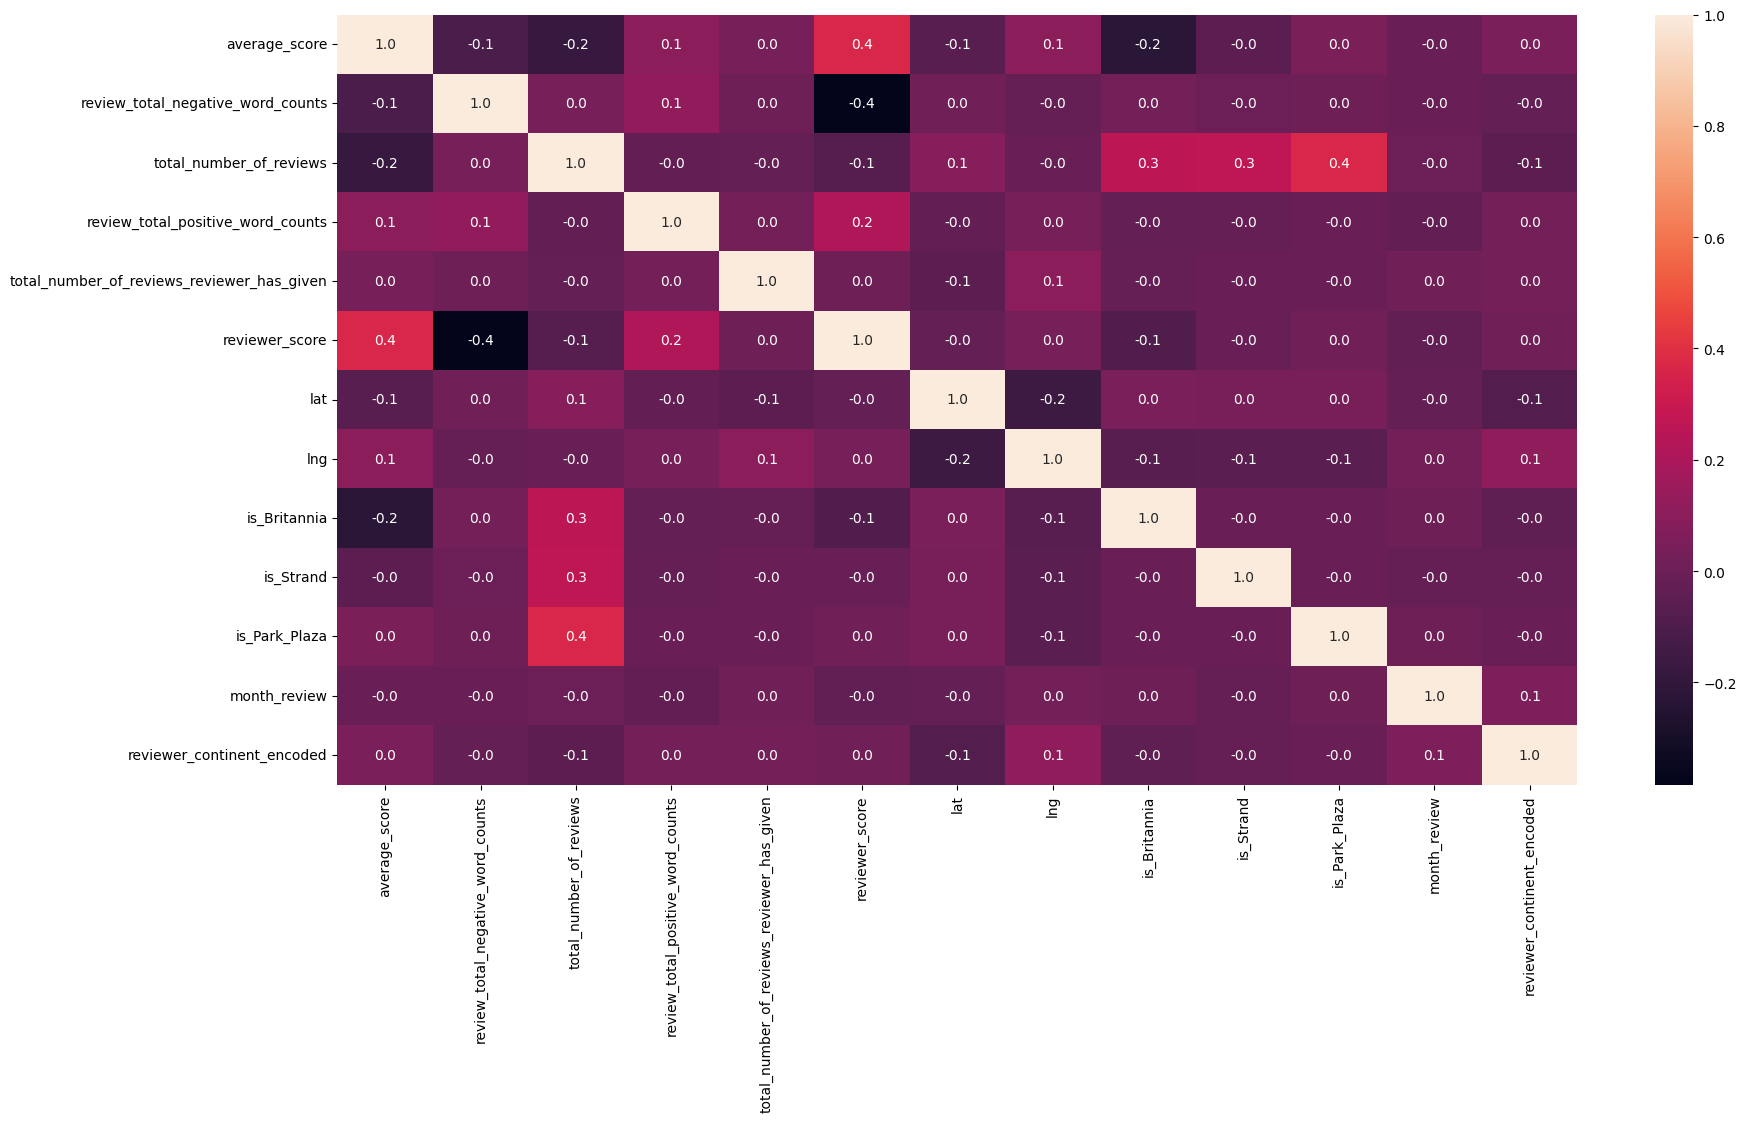

In [76]:
# проведём еще раз корреляционный анализ данных после удаления признаков, чтобы проверить их зависимость 
ax = plt.figure(figsize=(20,10))
sns.heatmap(hotels.corr(numeric_only=True), annot=True, fmt='.1f')

### _В результате получаем датасет, который содержит 13 полей со следующей информацией:_

* _average_score_ — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* _review_total_negative_word_counts_ — общее количество слов в отрицательном отзыв;
* _total_number_of_reviews_ — общее количество действительных отзывов об отеле;
* _review_total_positive_word_counts_ — общее количество слов в положительном отзыве;
* _total_number_of_reviews_reviewer_has_given_ — количество отзывов, которые рецензенты дали в прошлом;
* _reviewer_score_ — оценка, которую рецензент поставил отелю на основе своего опыта;
* _lat_ — географическая широта отеля;
* _lng_ — географическая долгота отеля;
* _is_Britannia_ - закодированный признак из топ-3 отелей, это отель Britannia International Hotel Canary Wharf; 
* _is_Strand_ -  закодированный признак из топ-3 отелей, это отель для Strand Palace Hotel;
* _is_Park_Plaza_ - закодированный признак из топ-3 отелей, это отель для Park Plaza Westminster Bridge London;
* _month_review_ - месяц даты, когда рецензент разместил соответствующий отзыв;
* _reviewer_continent_encoded_ — закодированные страны рецензента ('Europe': 1, 'Asia': 2, 'North America': 3, 'Oceania': 4, 'Africa': 5, 'South Аmerica': 6, 'Other': 7)

## Oценка значимости каждого признака для целевой переменной — рейтинг отеля

In [77]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

### Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

Для начала разделим признаки по типу, перечислим их:

In [78]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given', 'lat', 'lng']

# категориальные признаки
cat_cols = ['average_score', 'is_Britannia', 'is_Strand', 'is_Park_Plaza', 'month_review', 'reviewer_continent_encoded']	

<Axes: >

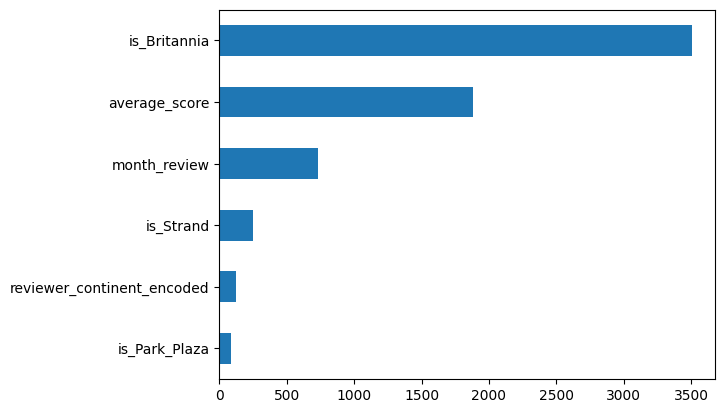

In [79]:
# Oценкa значимости категориальных переменных
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

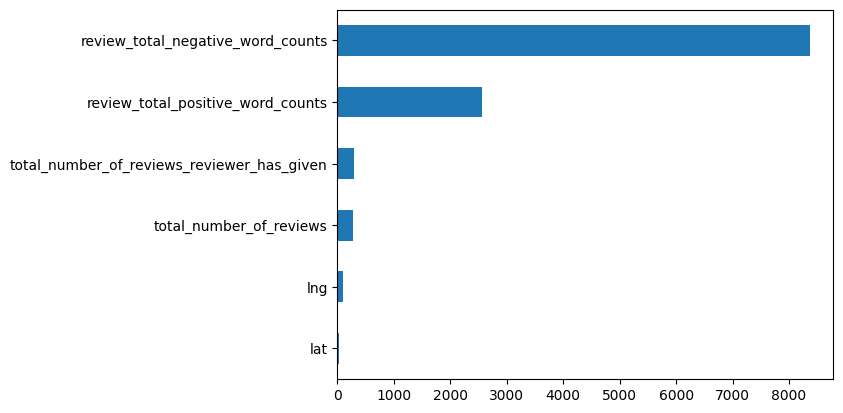

In [80]:
# Oценкa значимости непрерывных переменных
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Из оценки значимости категориальных признаков наиболее значимыми являются _is_Britannia_ - закодированный признак из топ-3 отелей, это отель Britannia International Hotel Canary Wharf и _average_score_ — средний балл отеля, рассчитанный на основе последнего комментария за последний год.

Из оценки значимости числовых признаков наиболее значисмым является _review_total_negative_word_counts_ — общее количество слов в отрицательном отзыв

## Обучение модели

In [81]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [82]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.16312278722807583
